# Tenure Prediction using Machine Learning 

## Objective

To determine the Tenure or Work experience of a Kaggle user using Machine Learning techniques.

## Dataset Source 

I have taken the dataset from Kaggle's [ML and Data Science Survey, 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017) . 

Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and they learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

In the given dataset, we are going to use the following columns to determine the work experience of an user.

1.	GenderSelect
2.	Country
3.	Age
4.	EmploymentStatus
5.	CodeWriter
6.	CurrentJobTitleSelect
7.	MLToolNextYearSelect
8.	MLMethodNextYearSelect
9.	LanguageRecommendationSelect
10.	FormalEducation
11.	MajorSelect
12.	Tenure
13.	FirstTrainingSelect
14.	LearningCategorySelftTaught
15.	LearningCategoryOnlineCourses
16.	LearningCategoryWork
17.	LearningCategoryUniversity
18.	LearningCategoryKaggle
19.	LearningCategoryOther


# Part A - Get Some Data

To analyse the data, first we will import the dataset to the notebook

In [2]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

response=pd.read_csv('./DS_ML_Survey_Kaggle.csv',encoding='ISO-8859-1', low_memory=False)
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [4]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


# Data Cleaning

## Remove or impute any bad data

Before we begin the Exploratory data analysis (EDA), we will first select the required column for the data frame

In [5]:
response = response[['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect','LearningCategorySelftTaught','LearningCategoryOnlineCourses','LearningCategoryWork','LearningCategoryUniversity','LearningCategoryKaggle','LearningCategoryOther']]
response.info()
reponse_1 = response

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 19 columns):
GenderSelect                     16621 non-null object
Country                          16595 non-null object
Age                              16385 non-null float64
EmploymentStatus                 16716 non-null object
CodeWriter                       13186 non-null object
CurrentJobTitleSelect            11830 non-null object
MLToolNextYearSelect             10998 non-null object
MLMethodNextYearSelect           10833 non-null object
LanguageRecommendationSelect     10998 non-null object
FormalEducation                  15015 non-null object
MajorSelect                      13281 non-null object
Tenure                           13532 non-null object
FirstTrainingSelect              14712 non-null object
LearningCategorySelftTaught      13109 non-null float64
LearningCategoryOnlineCourses    13126 non-null float64
LearningCategoryWork             13111 non-null float64
Learnin

### Are there missing values? (10 %)

In [6]:
response.isnull().sum()

GenderSelect                       95
Country                           121
Age                               331
EmploymentStatus                    0
CodeWriter                       3530
CurrentJobTitleSelect            4886
MLToolNextYearSelect             5718
MLMethodNextYearSelect           5883
LanguageRecommendationSelect     5718
FormalEducation                  1701
MajorSelect                      3435
Tenure                           3184
FirstTrainingSelect              2004
LearningCategorySelftTaught      3607
LearningCategoryOnlineCourses    3590
LearningCategoryWork             3605
LearningCategoryUniversity       3594
LearningCategoryKaggle           3590
LearningCategoryOther            3622
dtype: int64

#### From the above calculations, we can clearly say that there is alot of null/empty columns in the given data set

So before we try to learn more about or data set, lets first clean all the null values of the dataframe

In [7]:
response = response.dropna()
response.isnull().sum()

GenderSelect                     0
Country                          0
Age                              0
EmploymentStatus                 0
CodeWriter                       0
CurrentJobTitleSelect            0
MLToolNextYearSelect             0
MLMethodNextYearSelect           0
LanguageRecommendationSelect     0
FormalEducation                  0
MajorSelect                      0
Tenure                           0
FirstTrainingSelect              0
LearningCategorySelftTaught      0
LearningCategoryOnlineCourses    0
LearningCategoryWork             0
LearningCategoryUniversity       0
LearningCategoryKaggle           0
LearningCategoryOther            0
dtype: int64

In [8]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6894 non-null object
Country                          6894 non-null object
Age                              6894 non-null float64
EmploymentStatus                 6894 non-null object
CodeWriter                       6894 non-null object
CurrentJobTitleSelect            6894 non-null object
MLToolNextYearSelect             6894 non-null object
MLMethodNextYearSelect           6894 non-null object
LanguageRecommendationSelect     6894 non-null object
FormalEducation                  6894 non-null object
MajorSelect                      6894 non-null object
Tenure                           6894 non-null object
FirstTrainingSelect              6894 non-null object
LearningCategorySelftTaught      6894 non-null float64
LearningCategoryOnlineCourses    6894 non-null float64
LearningCategoryWork             6894 non-null float64
LearningCategoryUniversi

In [9]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 6894
Total number of Countries with respondents: 52
Country with highest respondents: United States with 1852 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


#### We can now observe that our dataframe is cleansed of null or empty values from the column we require. We have now 6894 rows out of 16716 total response

Now we can proceed with exploring our data

# Exploring the data

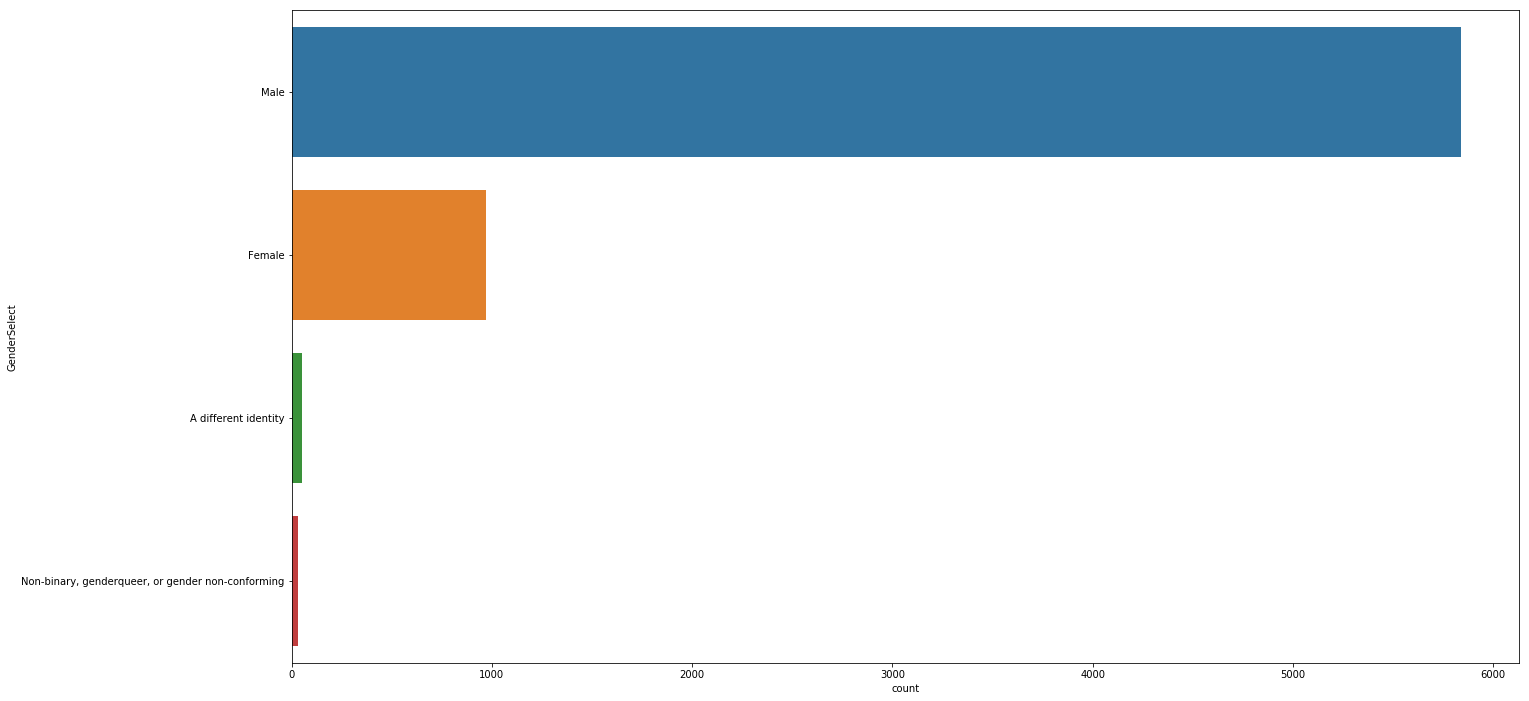

In [10]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

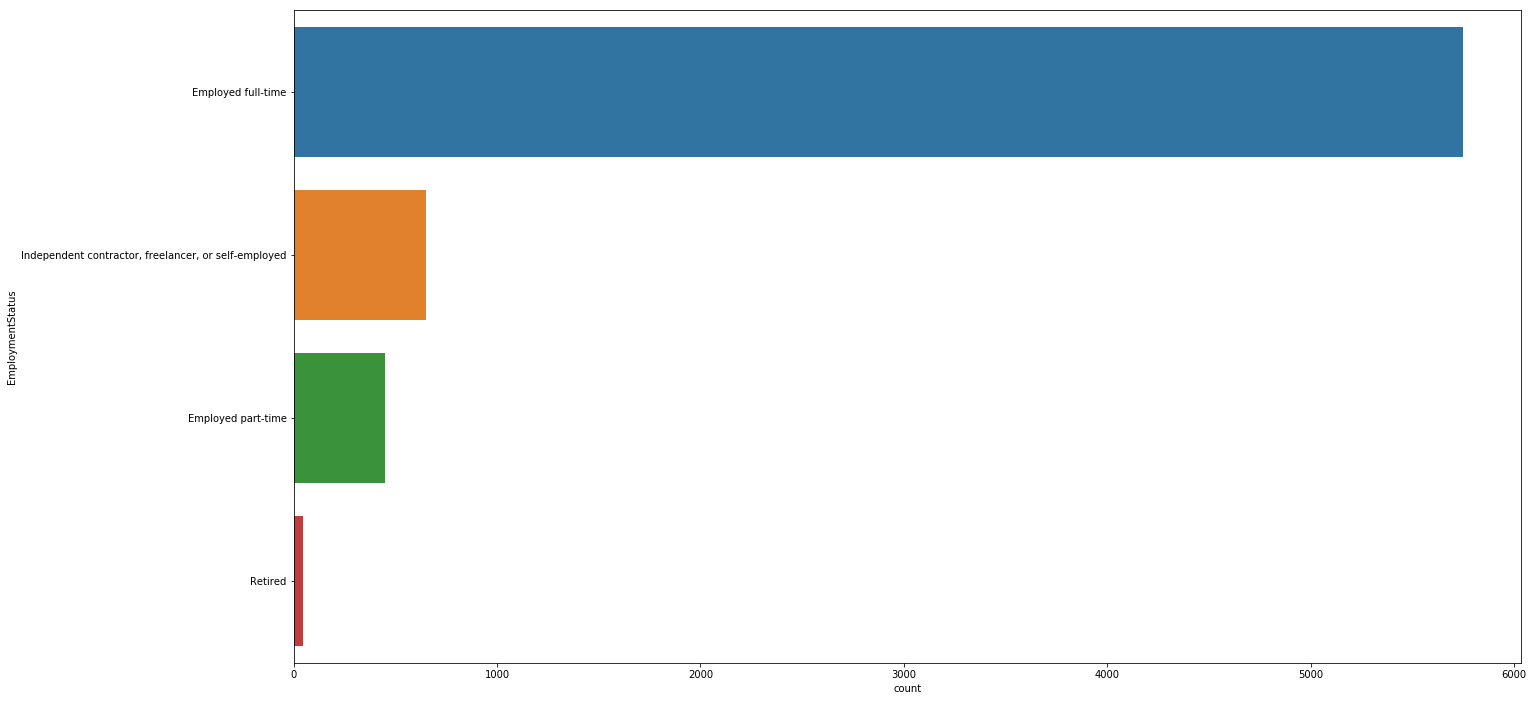

In [11]:

plt.subplots(figsize=(22,12))
sns.countplot(y=response['EmploymentStatus'],order=response['EmploymentStatus'].value_counts().index)
plt.show()

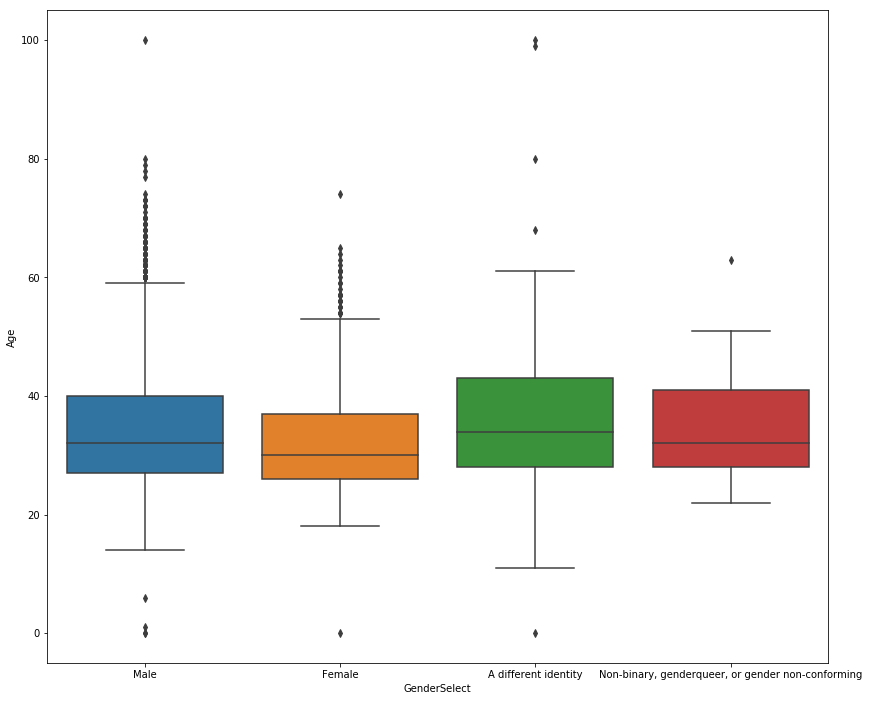

In [12]:
plt.figure(figsize=(14,12))
sns.boxplot(x='GenderSelect', y='Age', data=response);

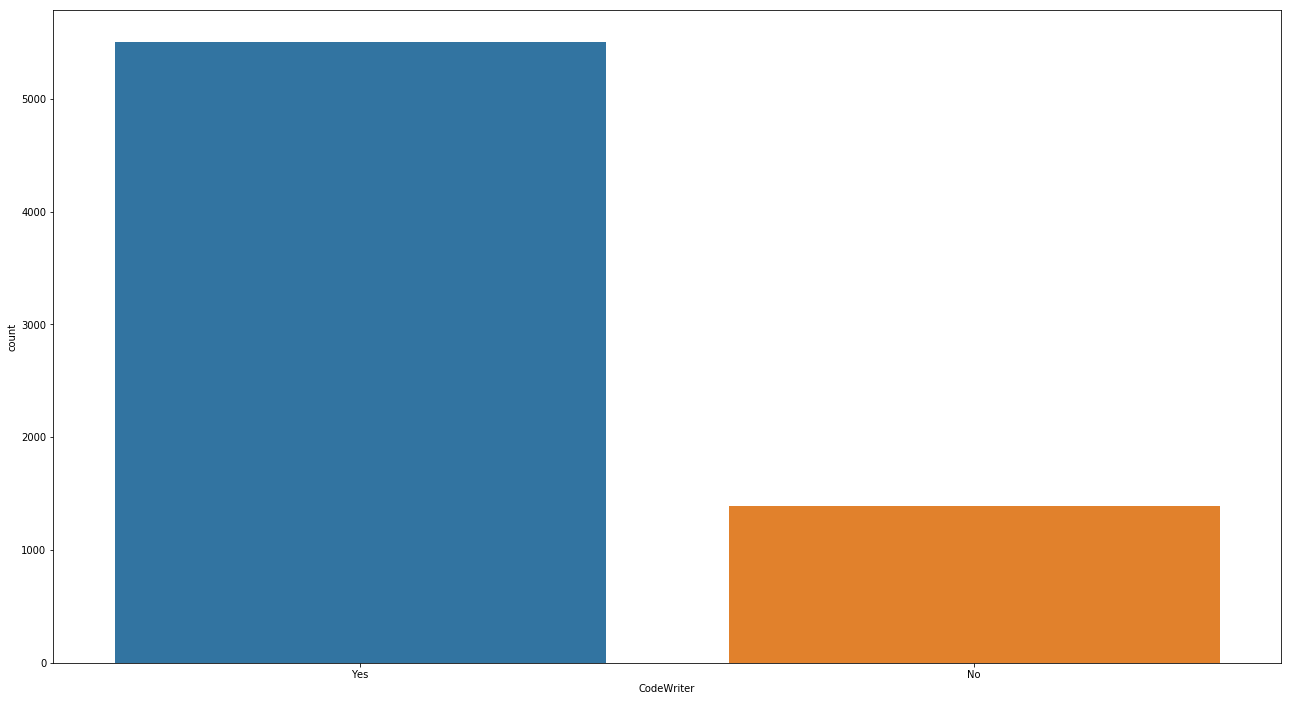

In [13]:
plt.subplots(figsize=(22,12))
sns.countplot(x=response['CodeWriter'],order=response['CodeWriter'].value_counts().index)
plt.show()

#### Are there inappropraite values? (10 %)

In [14]:
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

Youngest respondent: 0.0  and Oldest respondent: 100.0


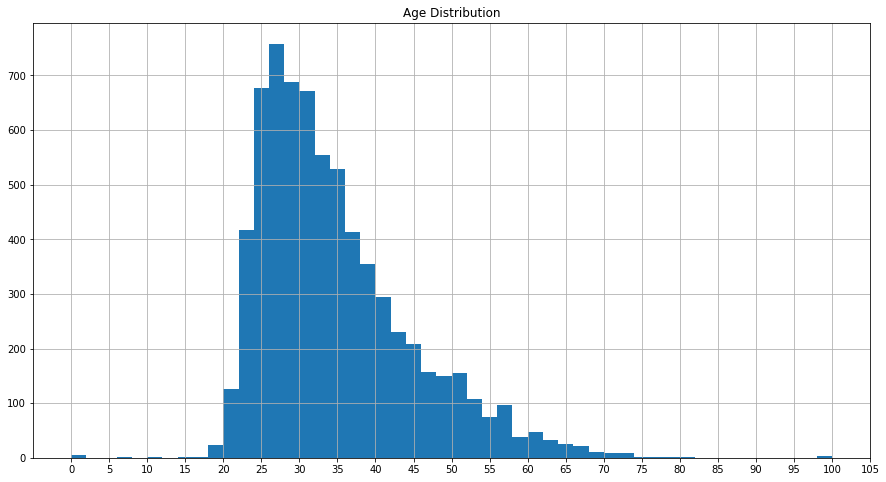

In [15]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,110,5)))
plt.title('Age Distribution')
plt.show()

#### It is not possible to have Kaggle Data science users with the age either 0 or 100. So to make this data appropriate, I have chosen that all the user below the age of 15 and the age above 85 is invalid data

In [16]:
response = response.loc[(response['Age'] >15) & (response['Age']<85)]
response.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6883 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6883 non-null object
Country                          6883 non-null object
Age                              6883 non-null float64
EmploymentStatus                 6883 non-null object
CodeWriter                       6883 non-null object
CurrentJobTitleSelect            6883 non-null object
MLToolNextYearSelect             6883 non-null object
MLMethodNextYearSelect           6883 non-null object
LanguageRecommendationSelect     6883 non-null object
FormalEducation                  6883 non-null object
MajorSelect                      6883 non-null object
Tenure                           6883 non-null object
FirstTrainingSelect              6883 non-null object
LearningCategorySelftTaught      6883 non-null float64
LearningCategoryOnlineCourses    6883 non-null float64
LearningCategoryWork             6883 non-null float64
LearningCategoryUniversi

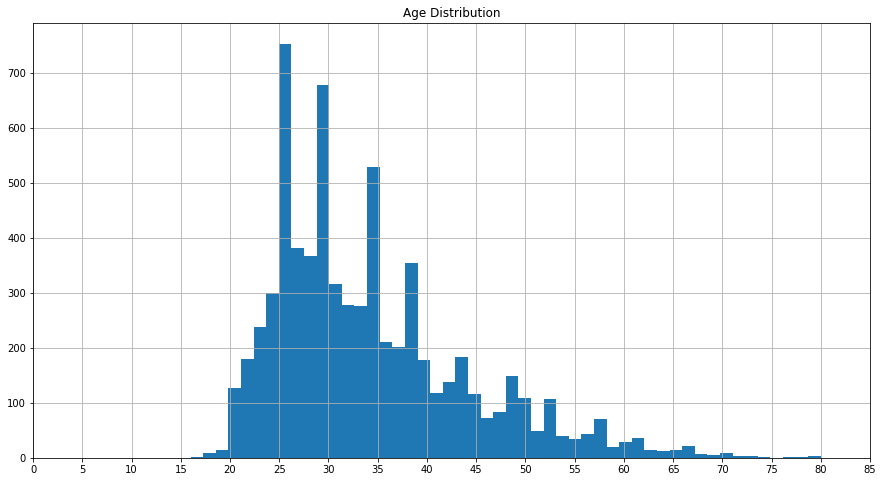

In [17]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50)
plt.xticks(list(range(0,90,5)))
plt.title('Age Distribution')
plt.show()


In [18]:
response.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
count,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000
mean,34.175795,33.255848,26.457141,16.679045,16.469999,5.504068,1.633900
std,9.870546,25.254476,26.096310,19.285703,22.719447,10.683210,8.757833
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000
75%,39.000000,50.000000,40.000000,30.000000,30.000000,10.000000,0.000000
max,80.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Next we are going to make all the category type values to the data format of category in the dataframe

In [19]:
col = ['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','Tenure','FirstTrainingSelect']
response_new = response
for i in col:
    response_new[i] = response_new[i].astype('category')
  


In [20]:
for col in ['Age']:
    response_new[col] = response_new[col].astype('float')
    
response_new.head()    

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,Tenure,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,More than 10 years,University courses,30.0,0.0,40.0,30.0,0.0,0.0
4,Male,Taiwan,38.0,Employed full-time,Yes,Computer Scientist,TensorFlow,Text Mining,Python,Doctoral degree,Engineering (non-computer focused),More than 10 years,University courses,60.0,5.0,5.0,30.0,0.0,0.0
5,Male,Brazil,46.0,Employed full-time,Yes,Data Scientist,TensorFlow,Genetic & Evolutionary Algorithms,Python,Doctoral degree,Electrical Engineering,6 to 10 years,"Online courses (coursera, udemy, edx, etc.)",45.0,25.0,20.0,0.0,10.0,0.0
6,Male,United States,35.0,Employed full-time,Yes,Computer Scientist,TensorFlow,Text Mining,R,Master's degree,Electrical Engineering,More than 10 years,University courses,40.0,0.0,0.0,50.0,10.0,0.0
7,Female,India,22.0,Employed full-time,No,Software Developer/Software Engineer,Google Cloud Compute,Deep learning,SQL,Bachelor's degree,Computer Science,1 to 2 years,University courses,0.0,40.0,0.0,50.0,10.0,0.0


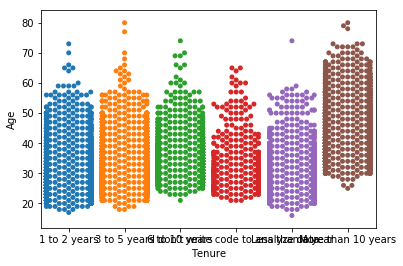

In [21]:
sns.swarmplot(x='Tenure', y='Age', data=response_new);

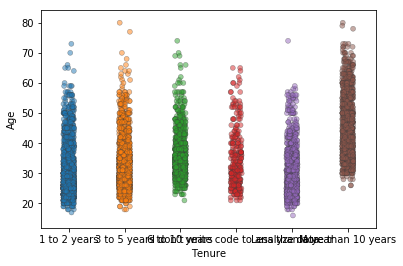

In [22]:
sns.stripplot(x='Tenure', y='Age', data=response_new, jitter=True, alpha=0.5, linewidth=0.5);

## Understanding Each column

In [23]:
response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6883 entries, 3 to 16712
Data columns (total 19 columns):
GenderSelect                     6883 non-null category
Country                          6883 non-null category
Age                              6883 non-null float64
EmploymentStatus                 6883 non-null category
CodeWriter                       6883 non-null category
CurrentJobTitleSelect            6883 non-null category
MLToolNextYearSelect             6883 non-null category
MLMethodNextYearSelect           6883 non-null category
LanguageRecommendationSelect     6883 non-null category
FormalEducation                  6883 non-null category
MajorSelect                      6883 non-null category
Tenure                           6883 non-null category
FirstTrainingSelect              6883 non-null category
LearningCategorySelftTaught      6883 non-null float64
LearningCategoryOnlineCourses    6883 non-null float64
LearningCategoryWork             6883 non-null float64


### How is the data distributed?

In [24]:
response.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
count,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000,6883.000000
mean,34.175795,33.255848,26.457141,16.679045,16.469999,5.504068,1.633900
std,9.870546,25.254476,26.096310,19.285703,22.719447,10.683210,8.757833
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000
75%,39.000000,50.000000,40.000000,30.000000,30.000000,10.000000,0.000000
max,80.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### What are the summary statistics?

In [36]:
response.describe(exclude=[np.number])

,GenderSelect,Country,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,Tenure,FirstTrainingSelect
count,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883,6883
unique,4,52,4,2,16,51,25,13,5,15,6,6
top,Male,United States,Employed full-time,Yes,Data Scientist,TensorFlow,Deep learning,Python,Master's degree,Computer Science,3 to 5 years,"Online courses (coursera, udemy, edx, etc.)"
freq,5832,1847,5740,5500,1575,1782,2820,4358,3197,2040,1791,2423


### Are there anomalies/outliers?

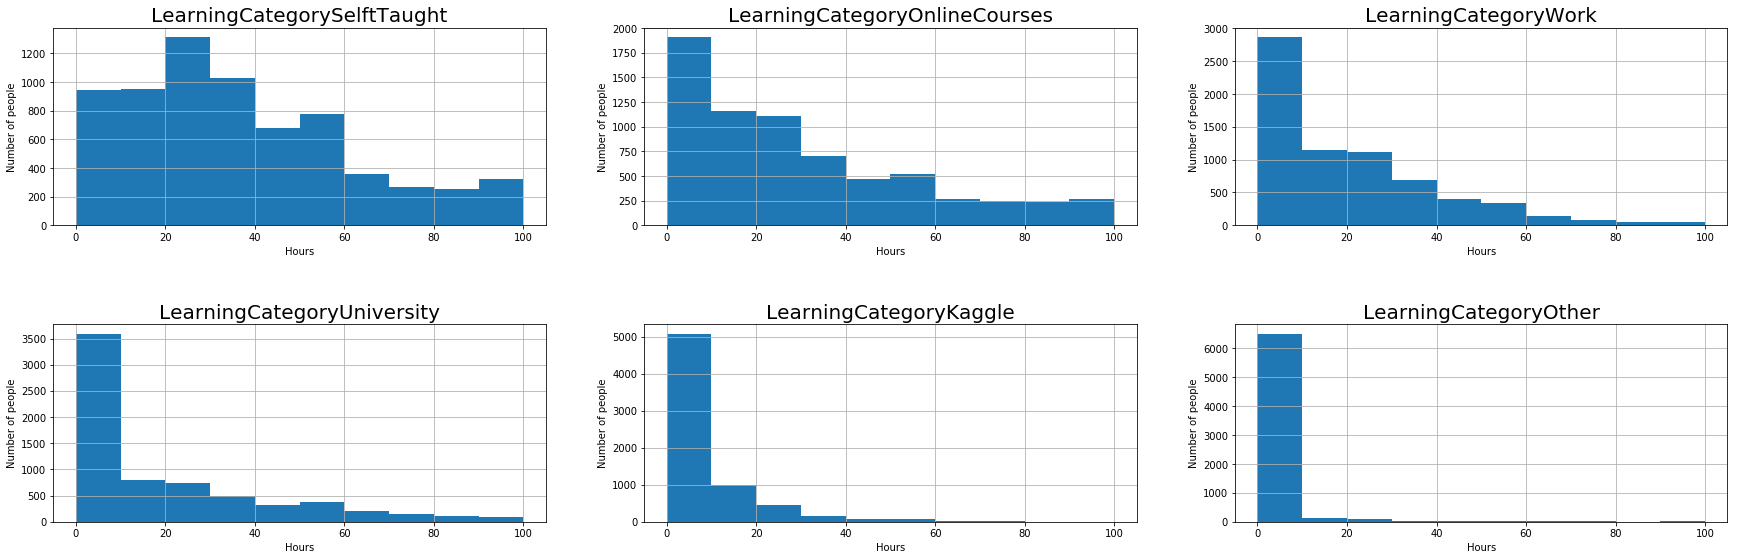

In [37]:
import itertools
Learningtype=["LearningCategorySelftTaught","LearningCategoryOnlineCourses","LearningCategoryWork","LearningCategoryUniversity","LearningCategoryKaggle","LearningCategoryOther"]
['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,20))
length=len(Learningtype)
for i,j in itertools.zip_longest(Learningtype,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    response_new[i].hist()
    plt.title(i,size=20)
    plt.ylabel('Number of people')
    plt.xlabel('Hours')
plt.show()

We observe that there are no more outlier in the data set taken.

### Are any of the columns correlated?

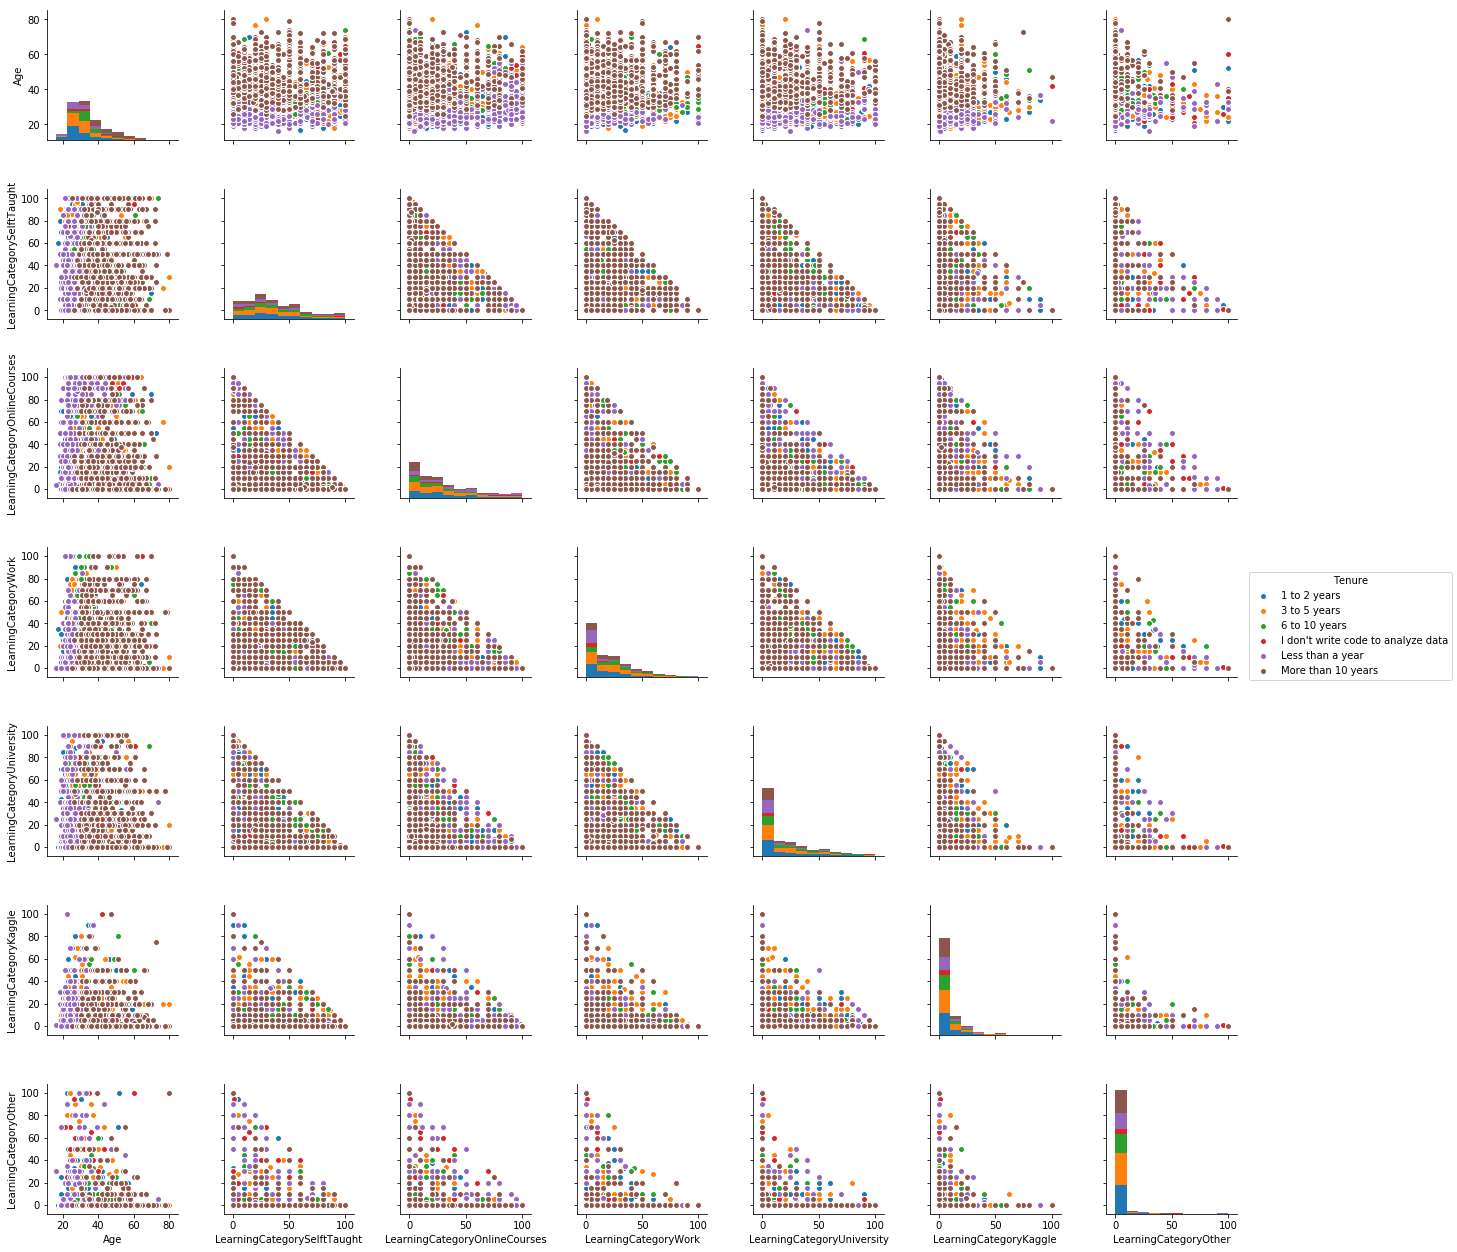

In [38]:
sns.pairplot(hue='Tenure', data=response_new)

In [39]:
cor = response_new.corr()
cor

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
Age,1.000000,0.091220,0.000445,0.045374,-0.114171,-0.048911,-0.008446
LearningCategorySelftTaught,0.091220,1.000000,-0.391676,-0.257017,-0.346929,-0.124464,-0.098735
LearningCategoryOnlineCourses,0.000445,-0.391676,1.000000,-0.323589,-0.372012,-0.071167,-0.085854
LearningCategoryWork,0.045374,-0.257017,-0.323589,1.000000,-0.105954,-0.117690,-0.078316
LearningCategoryUniversity,-0.114171,-0.346929,-0.372012,-0.105954,1.000000,-0.133029,-0.089657
LearningCategoryKaggle,-0.048911,-0.124464,-0.071167,-0.117690,-0.133029,1.000000,-0.044604
LearningCategoryOther,-0.008446,-0.098735,-0.085854,-0.078316,-0.089657,-0.044604,1.000000


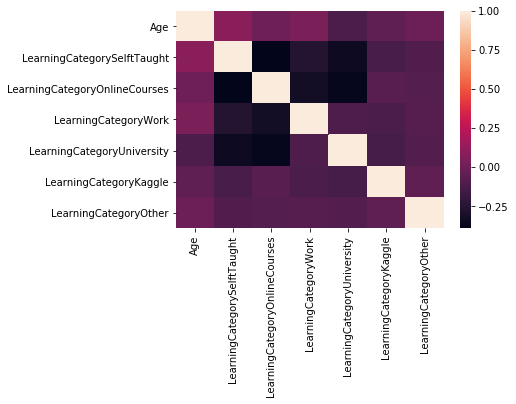

In [40]:
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns)


In [41]:
col = ['GenderSelect','Country','Age','EmploymentStatus','CodeWriter','Tenure','CurrentJobTitleSelect','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect','FormalEducation','MajorSelect','FirstTrainingSelect']
response_new_cat = response

for i in col:
    response_new_cat[i] = response_new_cat[i].astype('category')
    response_new_cat[i] = response_new_cat[i].cat.codes
    
response_new_cat.head()

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,Tenure,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
3,2,50,40,2,1,8,48,13,7,3,11,5,4,30.0,0.0,40.0,30.0,0.0,0.0
4,2,46,22,0,1,1,48,22,7,1,6,5,4,60.0,5.0,5.0,30.0,0.0,0.0
5,2,4,30,0,1,5,48,8,7,1,5,2,1,45.0,25.0,20.0,0.0,10.0,0.0
6,2,50,19,0,1,1,48,22,8,3,5,5,4,40.0,0.0,0.0,50.0,10.0,0.0
7,1,17,6,0,0,14,7,5,10,0,4,0,4,0.0,40.0,0.0,50.0,10.0,0.0


In [42]:
cor_cat = response_new_cat.corr()
cor_cat

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,Tenure,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
GenderSelect,1.000000,-0.059222,0.057670,0.000639,-0.001459,0.015101,0.017957,-0.025069,-0.003506,-0.026669,-0.037466,0.026944,-0.060211,0.064584,0.034460,-0.018422,-0.108988,0.066929,-0.047257
Country,-0.059222,1.000000,0.119307,-0.014001,0.043929,-0.014503,-0.011199,0.015271,-0.003126,0.002574,0.026564,0.062921,0.061619,0.014258,-0.073699,0.049732,0.042891,-0.035710,0.001268
Age,0.057670,0.119307,1.000000,0.148635,0.069371,0.046127,-0.015862,0.019653,0.002234,0.061280,0.062007,0.386783,0.004848,0.091356,0.000504,0.045363,-0.114229,-0.048978,-0.008760
EmploymentStatus,0.000639,-0.014001,0.148635,1.000000,0.003079,0.033825,-0.033856,0.036384,-0.045179,0.026910,0.008526,0.055497,-0.023007,0.033473,0.018290,-0.048769,-0.010882,-0.003654,-0.010943
CodeWriter,-0.001459,0.043929,0.069371,0.003079,1.000000,-0.141354,-0.013620,-0.024071,0.054331,0.037693,0.065927,-0.069601,0.172661,0.025268,-0.256555,0.307621,0.036725,-0.018189,-0.058890
CurrentJobTitleSelect,0.015101,-0.014503,0.046127,0.033825,-0.141354,1.000000,-0.009143,-0.007133,-0.092291,-0.034310,-0.034351,0.078433,-0.013231,0.063079,0.035063,-0.109275,-0.007263,-0.010735,-0.013806
MLToolNextYearSelect,0.017957,-0.011199,-0.015862,-0.033856,-0.013620,-0.009143,1.000000,-0.058029,0.056396,-0.013680,-0.007111,-0.016432,-0.029092,-0.022992,0.043384,-0.005323,-0.019644,0.018442,-0.022789
MLMethodNextYearSelect,-0.025069,0.015271,0.019653,0.036384,-0.024071,-0.007133,-0.058029,1.000000,0.018014,0.015067,0.009375,0.019614,-0.004603,0.021661,-0.000230,-0.009469,-0.021961,-0.005921,0.023265
LanguageRecommendationSelect,-0.003506,-0.003126,0.002234,-0.045179,0.054331,-0.092291,0.056396,0.018014,1.000000,0.025985,0.022768,-0.026929,-0.027944,-0.052882,0.045646,0.030364,-0.019273,-0.006223,0.007204
FormalEducation,-0.026669,0.002574,0.061280,0.026910,0.037693,-0.034310,-0.013680,0.015067,0.025985,1.000000,0.014047,-0.055484,0.048961,-0.044628,-0.045257,-0.000801,0.105998,0.011477,-0.023668


# Part B - Analyze Some Data

## What is expected?

From the survey data collected by Kaggle, We are going to determine the Tenure/Work experience of a Kaggle user. We will use the following machine learning techniques to determine which one would give better accuracy:

    1.Logistic Regression
    2.Linear Discriminant Analysis
    3.K Neighbors Classifier

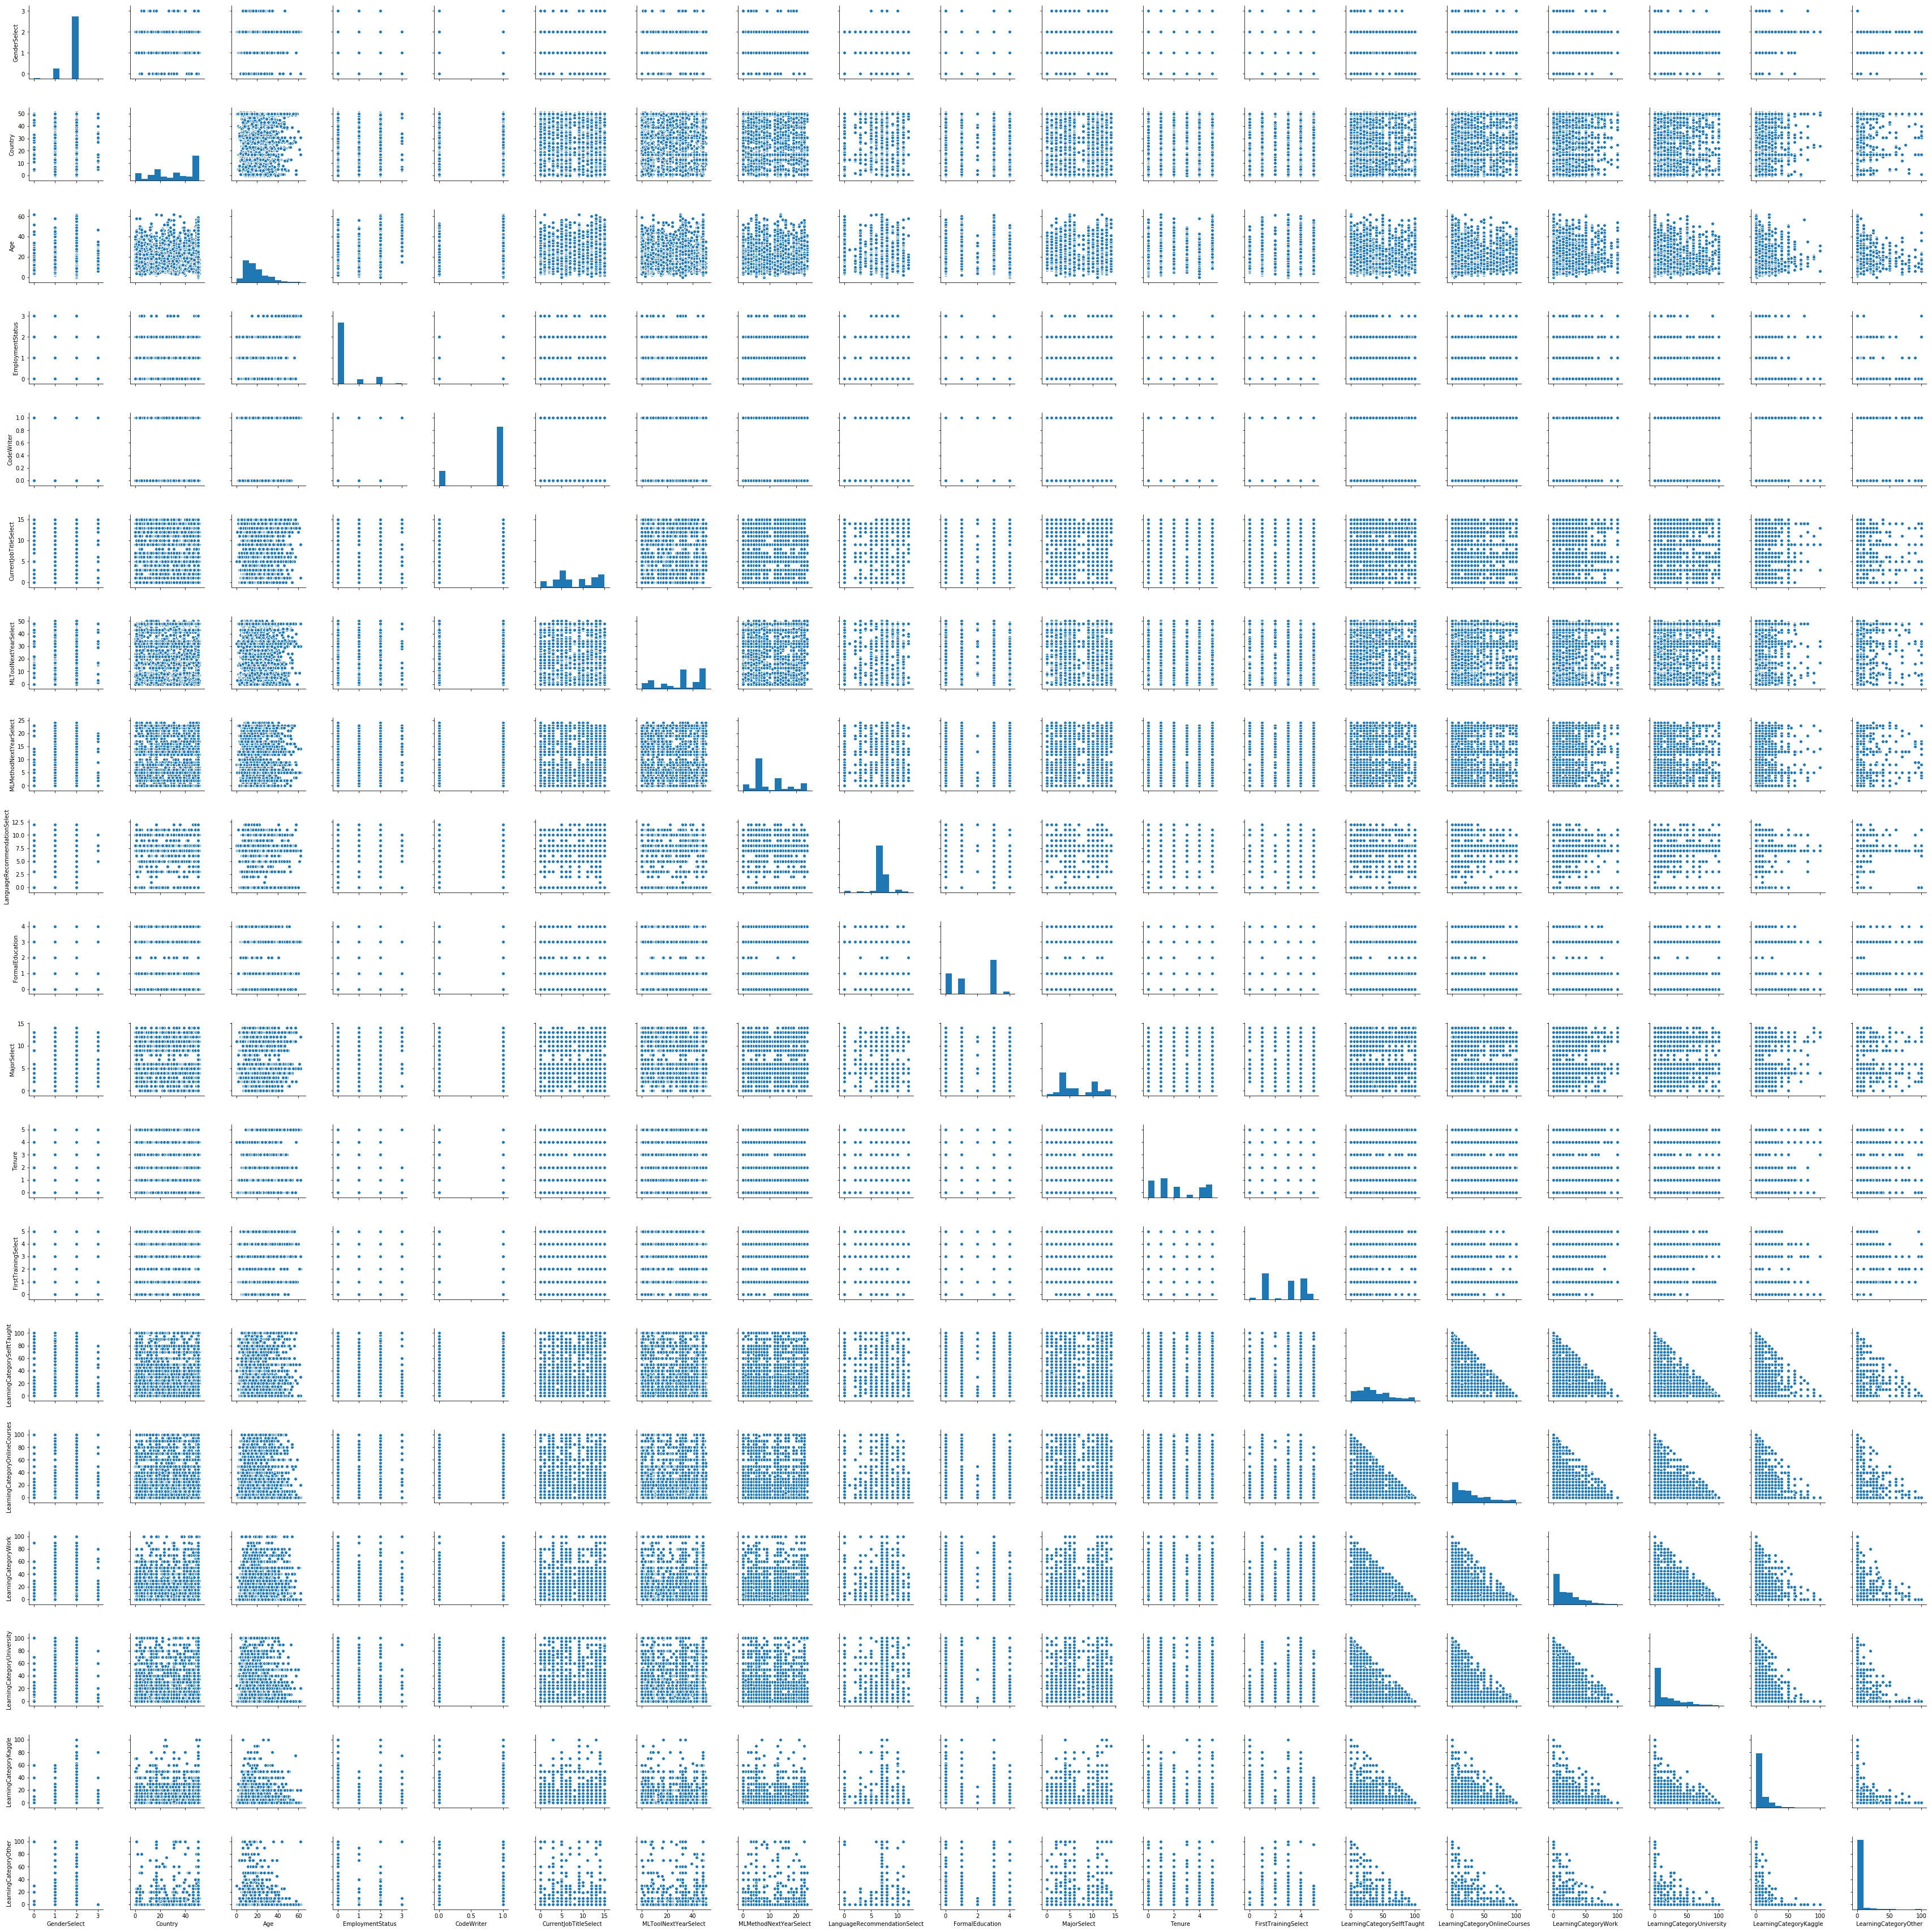

In [43]:
sns.pairplot(response_new)

## Dividing data into Training and Testin data

In [44]:
array = response_new.values
X = array[:,0:19]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [45]:
X

array([[  2.,  50.,  40., ...,  30.,   0.,   0.],
       [  2.,  46.,  22., ...,  30.,   0.,   0.],
       [  2.,   4.,  30., ...,   0.,  10.,   0.],
       ..., 
       [  2.,  23.,  28., ...,  10.,   0.,   0.],
       [  2.,  25.,  39., ...,   0.,   0.,   0.],
       [  2.,  18.,   9., ...,   0.,  10.,   0.]])

In [46]:
seed = 10
scoring = 'accuracy'

In [47]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.812568 (0.010174)
LDA: 0.404285 (0.016380)
KNN: 0.336537 (0.014270)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.261527 (0.015158)


### From the above we can conclude that Logistic Regression gives better accuracy for the given data set

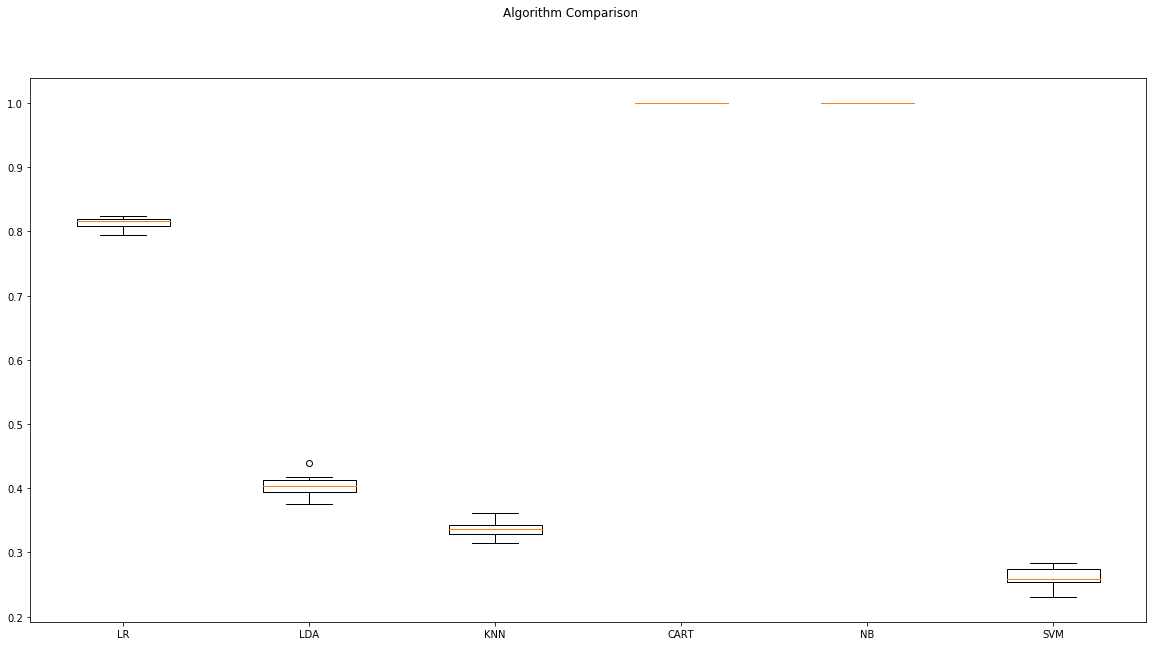

In [48]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## To determine the confusion matrix

In [49]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print("accuracy_score")
print(accuracy_score(Y_validation, predictions))
print("confusion_matrix")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy_score
0.81045751634
confusion_matrix
[[314   0   0   0   0   0]
 [  0 351   0   9   0   0]
 [  0 181  23   5   1   0]
 [  0   0   4  18  39   0]
 [  0   0  12  10 150   0]
 [  0   0   0   0   0 260]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       314
        1.0       0.66      0.97      0.79       360
        2.0       0.59      0.11      0.18       210
        3.0       0.43      0.30      0.35        61
        4.0       0.79      0.87      0.83       172
        5.0       1.00      1.00      1.00       260

avg / total       0.80      0.81      0.77      1377



# Conclusion

From the constructed machine learning models. We can conclude that Logistic regression model gives us a better prediction into categorising the data into diffent tenure

# References

[https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science](https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science)

[https://www.kaggle.com/ash316/novice-to-grandmaster](https://www.kaggle.com/ash316/novice-to-grandmaster)

[https://www.kaggle.com/rounakbanik/data-science-faq](https://www.kaggle.com/rounakbanik/data-science-faq)

[https://www.medcalc.org/manual/logistic_regression.php](https://www.medcalc.org/manual/logistic_regression.php)

[https://en.wikipedia.org/wiki/Linear_discriminant_analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
